<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Flask_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyngrok
!pip install flask

In [2]:
import getpass
from pyngrok import ngrok, conf

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········


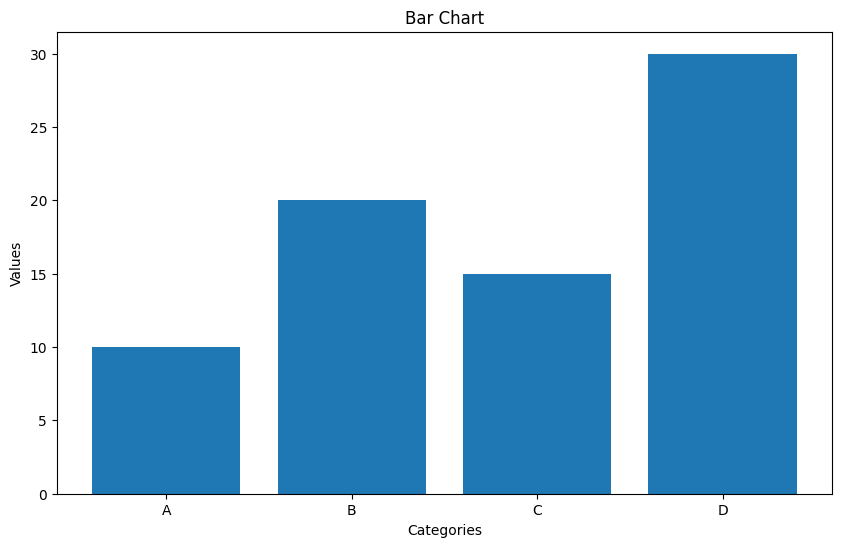

iVBORw0KGgoAAAANSUhEUgAAA+gAAAJYCAYAAADxHswlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAzAElEQVR4nO3de5zVdb3v8fcAMnK/KohiQqikhqcsDU0FhYA000hLMy/RxQKSqF1pHg23bkyTzALMfdTJylslXSgxBEFNjaRDqFvZ6BEvh4tpcnU7IKzzR9s5zRbb6gys7+Dz+Xisx8P1+/3Wb31mXIKv+a71m5pKpVIJAAAAUFWtqj0AAAAAINABAACgCAIdAAAACiDQAQAAoAACHQAAAAog0AEAAKAAAh0AAAAKINABAACgAAIdAAAACiDQAQAAoAACHQAAAAog0AEAAKAAAh0AAAAKINABAACgAAIdAAAACiDQAQAAoAACHQAAAAog0AEAAKAAAh0AAAAKINABAACgAAIdAAAACiDQAQAAoAACHQAAAAog0AEAAKAAAh0AAAAKINABAACgAAIdAAAACiDQAQAAoAACHQAAAAog0AEAAKAAAh0AAAAKINABAACgAAIdAAAACiDQAQAAoAACHQAAAAog0AEAAKAAAh0AAAAKINABAACgAAIdAAAACiDQAQAAoAACHQAAAAog0AEAAKAAAh0AAAAKINABAACgAAIdAAAACiDQAQAAoAACHQAAAAog0AEAAKAAAh0AAAAKINABgEbq6upSU1OTBx54oNqjAMBbikAHgG3oldj9+9uuu+6aoUOH5rbbbtvu88yYMSOjRo1Kz54907Zt2/Tp0ycnnXRS5s6du91necW0adNSV1dXtecHgFK0qfYAAPBWcOGFF6Zfv36pVCpZtWpV6urq8sEPfjC//vWvc+yxx27z569UKvnUpz6Vurq6vOtd78rEiRPTu3fvrFixIjNmzMjRRx+d3//+9zn00EO3+Sz/

In [8]:
import matplotlib.pyplot as plt
import io
import base64
import numpy as np

def generate_bar_chart(categories, values):
  #create the bar chart
  plt.figure(figsize=(10, 6))
  plt.bar(categories, values)
  plt.xlabel('Categories')
  plt.ylabel('Values')
  plt.title('Bar Chart')
  #save the plot to a bytesIO object
  buf = io.BytesIO()
  plt.savefig(buf, format = 'png')
  plt.show()
  plt.close()
  buf.seek(0)
  #encode the image as a base64 string
  encoded_string = base64.b64encode(buf.read()).decode('utf-8')
  buf.close()

  return encoded_string

# Example usage
categories = ['A', 'B', 'C', 'D']
values = [10, 20, 15, 30]

encoded_bar_chart = generate_bar_chart(categories, values)
print(encoded_bar_chart)  # Returns a base64 encoded string representing the bar chart


In [14]:
from flask import Flask, render_template, request
import threading
import matplotlib.pyplot as plt
import io
import os
import base64

os.environ["FLASK_DEBUG"] = "development"

app = Flask(__name__)
port = 5000

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url

def generate_bar_chart(categories, values):
  #create the bar chart
  plt.figure(figsize=(10, 6))
  plt.bar(categories, values)
  plt.xlabel('Categories')
  plt.ylabel('Values')
  plt.title('Bar Chart')
  #save the plot to a bytesIO object
  buf = io.BytesIO()
  plt.savefig(buf, format = 'png')
  plt.show()
  plt.close()
  buf.seek(0)
  #encode the image as a base64 string
  encoded_string = base64.b64encode(buf.read()).decode('utf-8')
  buf.close()

  return encoded_string

@app.route('/', methods=['GET', 'POST'])
def index():
    chart_url = None

    if request.method == 'POST':
        # Extract categories from the request form and convert the string to a
        # list.
        categories_str = request.form.get('categories')
        categories = categories_str.split(',') if categories_str else []
        # Extract values from the request form and convert the input string to a
        # list of integers.
        values_str = request.form.get('values')
        values = [int(x) for x in values_str.split(',') if x] if values_str else []

        # Pass your categories and values to the generate_bar_chart function.
        chart_url = generate_bar_chart(categories, values)

    # Return a render_template function, passing your bar plot as input.
    return render_template('index.html', chart_url=chart_url) # Assuming you have an 'index.html' template

if __name__ == '__main__':
    # Start the Flask server in a new thread
  threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * ngrok tunnel "https://f2b8-34-16-151-144.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
